In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sstats
from glob import glob
import numpy as np

In [2]:
example_data = pd.read_csv('ssrt_metrics/indiv_guesses.csv', index_col=0)
example_data.columns = example_data.columns.str.replace('SSRT_', '')
melt_df = pd.melt(example_data, id_vars=['SSD'], value_vars=['SSRT','w_guesses','w_graded'], var_name = 'assumed_go_dist', value_name='SSRT')

In [3]:
example_data

,SSRT,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,w_guesses,w_graded
0,390.0,0.0,0.300200,2835.0,510.074648,250.757903,0,0.0,NaN,NaN,0.0,293.210586,2197.0
1,376.0,50.0,0.389424,2835.0,510.074648,273.015415,0,0.0,NaN,NaN,50.0,287.291344,365.0
2,352.0,100.0,0.452896,2835.0,510.074648,300.938390,0,0.0,NaN,NaN,100.0,287.000000,382.0
3,331.0,150.0,0.520200,2835.0,510.074648,327.939384,0,0.0,NaN,NaN,150.0,284.000000,251.0
4,311.0,200.0,0.585544,2835.0,510.074648,358.176865,0,0.0,NaN,NaN,200.0,282.000000,178.0
5,301.0,250.0,0.659856,2835.0,510.074648,381.922188,0,0.0,NaN,NaN,250.0,282.000000,298.0
6,295.0,300.0,0.730408,2835.0,510.074648,404.284592,0,0.0,NaN,NaN,300.0,281.000000,384.0
7,288.0,350.0,0.787440,2835.0,510.074648,424.087584,0,0.0,NaN,NaN,350.0,280.000000,360.0
8,284.0,400.0,0.836488,2835.0,510.074648,439.547447,0,0.0,NaN,NaN,400.0,279.000000,340.0
9,280.0,450.0,0.875024,2835.0,510.074648,453.660286,0,0.0,NaN,NaN,450.0,277.000000,319.0


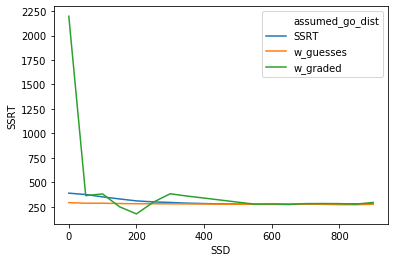

In [4]:
_ = sns.lineplot(x='SSD', y='SSRT', hue='assumed_go_dist', data=melt_df)

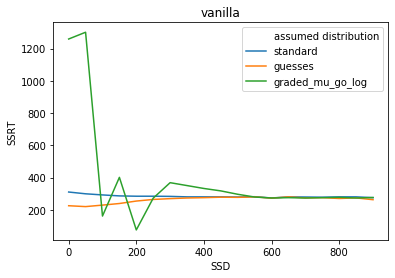

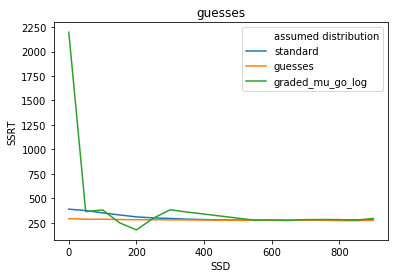

KeyError: "The following 'value_vars' are not present in the DataFrame: ['graded_mu_go_log', 'guesses']"

In [5]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in [i for i in glob('ssrt_metrics/indiv_*.csv') if 'linear' not in i]:
    title = file.split('indiv_')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard', 'w_guesses': 'guesses', 'w_graded': 'graded_mu_go_log'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard','guesses','graded_mu_go_log'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    
    _ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', data=melt_df)
    
    plt.title(title)
    plt.show()
    plt.close()
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

# organize ssrt metric data

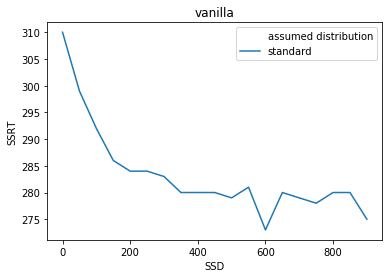

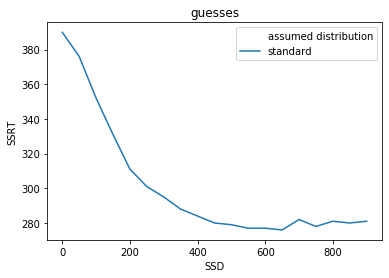

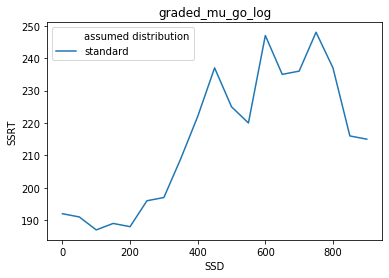

/Users/henrymj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [6]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in [i for i in glob('ssrt_metrics/indiv_*.csv') if 'linear' not in i]:
    title = file.split('indiv_')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

In [7]:
full_metric_df

,SSD,go_acc,max_RT,mean_SSD,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,p_respond,standard,stopfail_acc,underlying distribution,w_graded,w_guesses
0,0.0,NaN,2060.0,0.0,510.485392,305.528544,0,0.0,0.118272,310.0,NaN,vanilla,1259.0,225.004381
1,50.0,NaN,2060.0,50.0,510.485392,321.227141,0,0.0,0.201848,299.0,NaN,vanilla,1301.0,219.578634
2,100.0,NaN,2060.0,100.0,510.485392,339.515996,0,0.0,0.307336,292.0,NaN,vanilla,161.0,228.841259
3,150.0,NaN,2060.0,150.0,510.485392,358.956114,0,0.0,0.417448,286.0,NaN,vanilla,401.0,238.809545
4,200.0,NaN,2060.0,200.0,510.485392,379.204664,0,0.0,0.527224,284.0,NaN,vanilla,75.0,254.000000
5,250.0,NaN,2060.0,250.0,510.485392,397.922866,0,0.0,0.627376,284.0,NaN,vanilla,272.0,264.000000
6,300.0,NaN,2060.0,300.0,510.485392,416.076186,0,0.0,0.710680,283.0,NaN,vanilla,368.0,269.000000
7,350.0,NaN,2060.0,350.0,510.485392,430.886863,0,0.0,0.776896,280.0,NaN,vanilla,350.0,273.000000
8,400.0,NaN,2060.0,400.0,510.485392,445.436975,0,0.0,0.830272,280.0,NaN,vanilla,332.0,275.000000
9,450.0,NaN,2060.0,450.0,510.485392,456.590310,0,0.0,0.873656,280.0,NaN,vanilla,317.0,278.000000


# SSRT by SSD

ValueError: The palette list has the wrong number of colors.

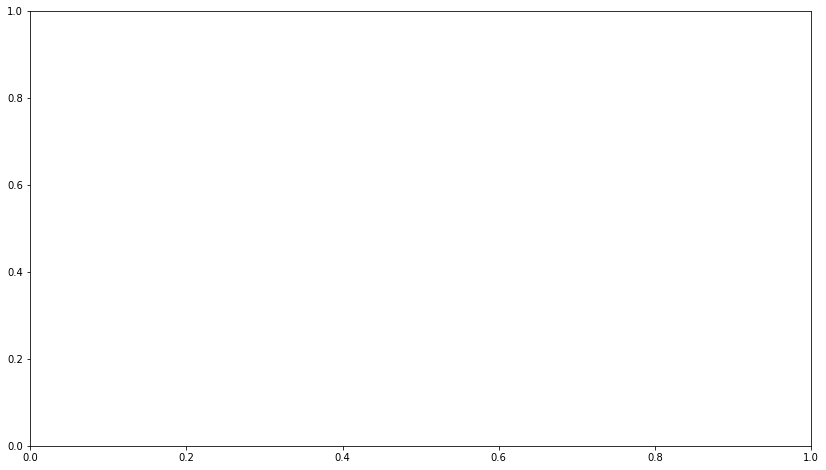

In [8]:
# fig,ax = plt.subplots(1,1, figsize=(14, 8))
# keep_idx = ((full_melt['assumed distribution'] == 'standard') | (full_melt['assumed distribution'] == full_melt['underlying distribution'])) & (full_melt['SSD'] <= 650)
# _ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', style='underlying distribution', data=full_melt[keep_idx], palette=['k', '#1f77b4', '#ff7f0e'], linewidth=3)
# plt.savefig('figures/SSRT_by_SSD_supplement.pdf')


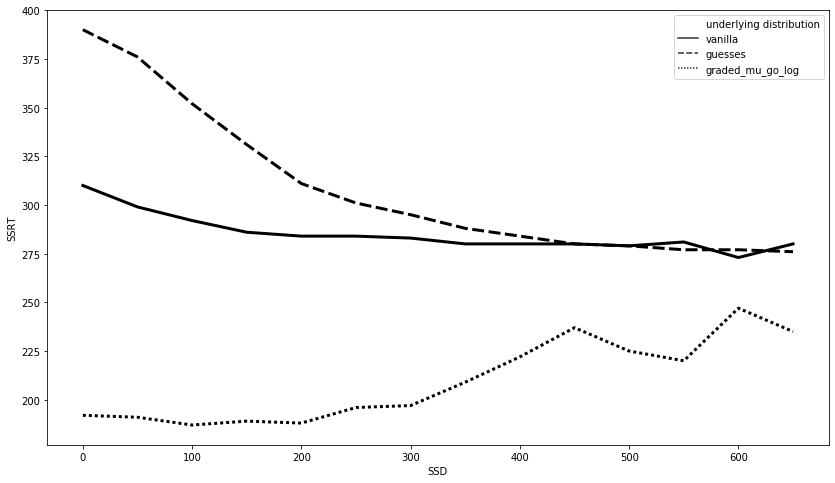

In [9]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='SSRT', color='k', style='underlying distribution', data=full_melt[(full_melt['assumed distribution'] == 'standard') & (full_melt['SSD'] <= 650)], linewidth=3)
plt.savefig('figures/SSRT_by_SSD.pdf')

# Inhibition Function

In [22]:
abcd_inhib_func = pd.read_csv('abcd_data/abcd_inhib_func.csv')

In [23]:
inhib_func_df = pd.concat([full_metric_df[['SSD', 'p_respond', 'underlying distribution']], abcd_inhib_func], 0)

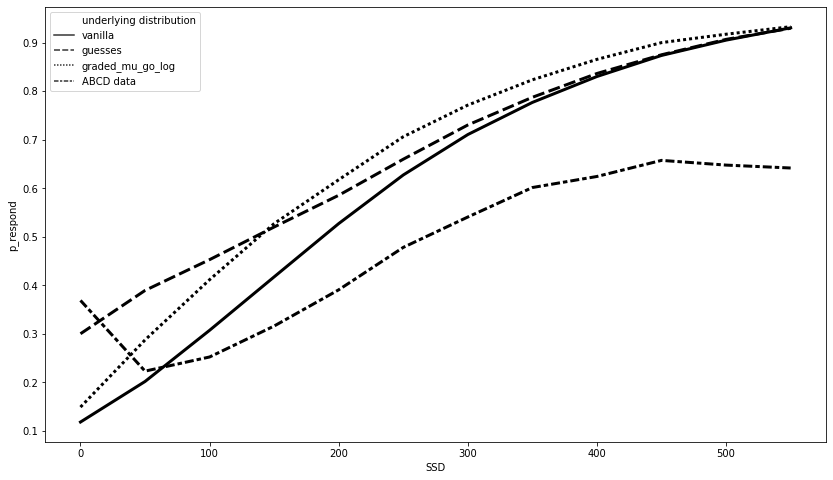

In [26]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='p_respond', color='k', style='underlying distribution', data=inhib_func_df.query('SSD < 600'), linewidth=3)
plt.savefig('figures/inhibition_function.pdf')

# Individual Differences

In [18]:
ABCD_SSD_dists = pd.read_csv('abcd_data/SSD_dist_by_subj.csv')
ABCD_SSD_dists

,NARGUID,SSDDur,proportion
0,003RTV85,300.0,0.250000
1,003RTV85,250.0,0.183333
2,003RTV85,400.0,0.183333
3,003RTV85,350.0,0.166667
4,003RTV85,450.0,0.100000
...,...,...,...
64043,xxmy9wd8,100.0,0.183333
64044,xxmy9wd8,150.0,0.133333
64045,xxmy9wd8,200.0,0.116667
64046,xxmy9wd8,250.0,0.100000


In [ ]:
indiv_SSRTs = pd.DataFrame()
for file in [i for i in glob('ssrt_metrics/indiv_*.csv') if 'linear' not in i]:
    data =  pd.read_csv(file, index_col=0)
    
#     if 'graded' in file:
#         data.loc[data.SSD==0, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']] = data.loc[data.SSD==50.0, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']].values
#     else:
#         data.loc[data.SSD==0, 'SSRT_w_graded'] = data.loc[data.SSD==50.0, 'SSRT_w_graded'].values
    
    gen_str = file.split('indiv_')[-1].replace('.csv', '')
    indiv_ssrt_df = pd.DataFrame(np.nan, index=ABCD_SSD_dists.NARGUID.unique(), columns=['vanilla', 'w_guesses', 'w_graded'])
    for sub in ABCD_SSD_dists.NARGUID.unique():
        curr_sub = ABCD_SSD_dists.query("NARGUID=='%s'" % sub)
        indiv_ssrt_df.loc[sub, :] = [0, 0, 0]
        for SSD in curr_sub.SSDDur:
            ssd_SSRTs = data.loc[data.SSD==SSD, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']].values[0]
            weight = curr_sub.loc[curr_sub.SSDDur==SSD, 'proportion'].values
            indiv_ssrt_df.loc[sub, :] +=  ssd_SSRTs * weight
    indiv_SSRTs = pd.concat([indiv_SSRTs, indiv_ssrt_df.add_prefix('gen-%s_SSRT-' % gen_str)], 1)

In [19]:
indiv_SSRTs.to_csv('outputs/ABCD_weighted_SSRTs.csv')
indiv_SSRTs

NameError: name 'indiv_SSRTs' is not defined

In [20]:
indiv_SSRTs.corr().to_csv('outputs/ABCD_weighted_SSRTs_corr.csv')
indiv_SSRTs.corr()

NameError: name 'indiv_SSRTs' is not defined

In [21]:
indiv_SSRTs_rank = pd.DataFrame()
for col in indiv_SSRTs.columns:
    indiv_SSRTs_rank[col] = indiv_SSRTs[col].rank()
indiv_SSRTs_rank.corr().to_csv('outputs/ABCD_weighted_SSRTs_rank-corr.csv')
indiv_SSRTs_rank.corr()

NameError: name 'indiv_SSRTs' is not defined

In [ ]:
indiv_SSRTs_rank.filter(regex='SSRT-vanilla').corr()